In [53]:
import ROOT
import numpy as np

In [184]:
# TLorentzVector v1, TLorentzVector v2
def GetVariablesInRestFrame(v1, v2):
    v0 = v1 + v2
    q2 = v0.M2()

    v10 = None
    v20 = None

    if v0.Vect().Mag()/v0.E() > 1.E-6:
      # only do boost when beta > 1.E-6
      # redefine the axis
      # TVector3
      axiszOrig = ROOT.TVector3(0., 0., 1.)
      axis0z    = v0.Vect().Unit()
      axis0x    = axis0z.Cross(axiszOrig).Unit()
      axis0y    = axis0z.Cross(axis0x)

      # boost to rest frame
      bst  = ROOT.TVector3(0., 0., v0.Vect().Mag()/v0.E())
      v10  = ROOT.TLorentzVector(v1.Vect()*axis0x,v1.Vect()*axis0y,v1.Vect()*axis0z,v1.E())
      v20  = ROOT.TLorentzVector(v2.Vect()*axis0x,v2.Vect()*axis0y,v2.Vect()*axis0z,v2.E())
      
      v10.Boost(-bst)
      v20.Boost(-bst)
      costheta = v10.CosTheta()
      phi = v10.Phi()
    else:
      costheta = v1.CosTheta()
      phi = v1.Phi()

    return (q2, costheta, phi, v10, v20)


In [185]:
v1 = ROOT.TLorentzVector(-0.5, -1, 2, 1)
v2 = ROOT.TLorentzVector(1, 1, -1, 2)

In [186]:
# Only for non-boosted! 
def theta(v):
    if v[2] == 0:
        if v[0] * v[1] == 0:
            raise Exception("Invalid operation")
        else:
            return np.pi/2
    else:
        return ( np.arctan(np.sqrt(v[0]**2 + v[1]**2)/v[2]) + (np.pi if (v[2] < 0) else 0) )

def costheta(v):
    return v[2]/v.Vect().Mag()

In [188]:
q21, costheta1, phi1, v101, v201 = GetVariablesInRestFrame(v2, v1)
q22, costheta2, phi2, v102, v202 = GetVariablesInRestFrame(v1, v2)

print((q21, costheta1, phi1))
print((q22, costheta2, phi2))

(7.75, -0.6091095901015048, 2.2113186394743214)
(7.75, 0.6091095901015048, -0.9302740141154721)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name


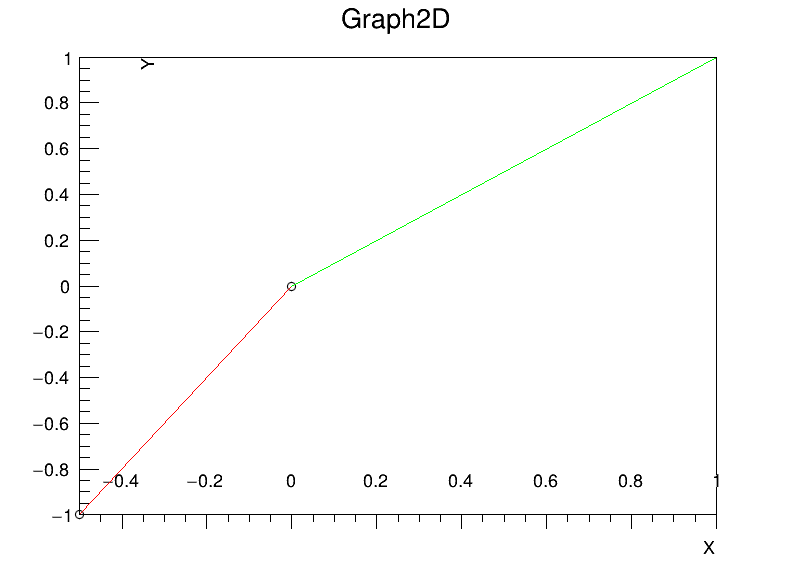

In [190]:
canv = ROOT.TCanvas("c_name", "c_title", 800, 600)
#canv.SetTheta(45)
#canv.SetPhi(60)
canv.SetTheta(90)
canv.SetPhi(0)

g = ROOT.TGraph2D()
g.SetPoint(0, min(v1[0], v2[0]), min(v1[1], v2[1]), min(v1[2], v2[2]))
g.SetPoint(1, max(v1[0], v2[0]), max(v1[1], v2[1]), max(v1[2], v2[2]))
g.SetPoint(2, 0, 0, 0)
g.Draw("P0")

xaxis = g.GetXaxis()
yaxis = g.GetYaxis()
zaxis = g.GetZaxis()

xaxis.SetTitle("X")
yaxis.SetTitle("Y")
zaxis.SetTitle("Z")

l1 = ROOT.TPolyLine3D(2)
l1.SetPoint(0, 0, 0, 0)
l1.SetPoint(1, v1[0], v1[1], v1[2])
l1.SetLineColor(2)
l1.Draw()

l2 = ROOT.TPolyLine3D(2)
l2.SetPoint(0, 0, 0, 0)
l2.SetPoint(1, v2[0], v2[1], v2[2])
l2.SetLineColor(3)
l2.Draw()

canv.Draw()